## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

In [56]:
! git clone https://github.com/hannahabele/EDA-Lab

fatal: destination path 'EDA-Lab' already exists and is not an empty directory.


In [57]:
import numpy as np
import pandas as pd #Importing Pandas

politics = pd.read_csv('/content/EDA-Lab/GSS_results.csv') #getting and reading csv file

In [58]:
#Check for missing variables
politics.isnull().sum()

politics.head()

,year,id_,partyid,civic,locinflu,intpol,gavepol,poleff1
0,1972,1,"Independent, close to democrat",.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable
1,1972,2,Not very strong democrat,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable
2,1972,3,"Independent (neither, no response)",.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable
3,1972,4,Not very strong democrat,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable
4,1972,5,Strong democrat,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable


In [59]:
#Delete Rows without data across all columns
politics.dropna(how='all', inplace=True)
politics.head()
#None ended up being deleted

,year,id_,partyid,civic,locinflu,intpol,gavepol,poleff1
0,1972,1,"Independent, close to democrat",.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable
1,1972,2,Not very strong democrat,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable
2,1972,3,"Independent (neither, no response)",.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable
3,1972,4,Not very strong democrat,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable
4,1972,5,Strong democrat,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable,.i: Inapplicable


In [60]:
# Remove ".i: Inapplicable" and get rid of whitespace in object columns
for col in politics.select_dtypes(include=['object']).columns:
    politics[col] = politics[col].str.replace(r"^\.i:\s+", "", regex=True).str.strip()

# Drop duplicate rows if any exist
politics.drop_duplicates(inplace=True) #none needed to be dropped

politics.head()

,year,id_,partyid,civic,locinflu,intpol,gavepol,poleff1
0,1972,1,"Independent, close to democrat",Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable
1,1972,2,Not very strong democrat,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable
2,1972,3,"Independent (neither, no response)",Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable
3,1972,4,Not very strong democrat,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable
4,1972,5,Strong democrat,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable


In [61]:
# Creating consistent labels for partyid to make the data easier to manage

politics['partyid'] = politics['partyid'].replace({
    '.n:  No answer': 'No Answer',
    'Not very strong democrat': 'Democrat',
    'Independent, close to republican': 'Independent',
    'Independent, close to democrat': 'Independent',
    'Not very strong republican': 'Republican',
    'Strong democrat': 'Democrat',
    'Strong republican': 'Republican',
    'Independent (neither, no response)': 'Independent',
    '.d:  Do not Know/Cannot Choose': 'No Answer', #Creating this no Answer to make data easier to manage and they did not provide an answer
    'No Answer': 'No Answer'
})

# Check unique values after cleanup
print(politics['partyid'].unique())


politics.head()

['Independent' 'Democrat' 'Republican' 'Other party' 'No Answer']


,year,id_,partyid,civic,locinflu,intpol,gavepol,poleff1
0,1972,1,Independent,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable
1,1972,2,Democrat,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable
2,1972,3,Independent,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable
3,1972,4,Democrat,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable
4,1972,5,Democrat,Inapplicable,Inapplicable,Inapplicable,Inapplicable,Inapplicable


In [62]:
# Replace "Inapplicable" with NaN
politics.replace("Inapplicable", np.nan, inplace=True)

politics.head()

,year,id_,partyid,civic,locinflu,intpol,gavepol,poleff1
0,1972,1,Independent,NaN,NaN,NaN,NaN,NaN
1,1972,2,Democrat,NaN,NaN,NaN,NaN,NaN
2,1972,3,Independent,NaN,NaN,NaN,NaN,NaN
3,1972,4,Democrat,NaN,NaN,NaN,NaN,NaN
4,1972,5,Democrat,NaN,NaN,NaN,NaN,NaN


In [63]:
# Creating consistent labels for civic to make the data easier to manage
politics['civic'] = politics['civic'].replace({
    '.d:  Do not Know/Cannot Choose': 'No Answer', #makign this "no answer" to make data easier to manage
    '.n:  No answer': 'No Answer',
    '.y:  Not available in this year': 'No Answer', #making this "no answer" to make data easier to manage
    'NOW AND THEN': 'Now and Then',
    'SOME OF THE TIME': 'Some of the Time', #essentially just making these lowercase
    'MOST OF THE TIME': 'Most of the Time',
    'HARDLY AT ALL': 'Hardly at All'

})

# Check unique values after cleanup
print(politics['civic'].unique())


politics.head()

[nan 'Now and Then' 'Some of the Time' 'Most of the Time' 'Hardly at All'
 'No Answer']


,year,id_,partyid,civic,locinflu,intpol,gavepol,poleff1
0,1972,1,Independent,NaN,NaN,NaN,NaN,NaN
1,1972,2,Democrat,NaN,NaN,NaN,NaN,NaN
2,1972,3,Independent,NaN,NaN,NaN,NaN,NaN
3,1972,4,Democrat,NaN,NaN,NaN,NaN,NaN
4,1972,5,Democrat,NaN,NaN,NaN,NaN,NaN


In [64]:
# Creating consistent labels for locinflu to make the data easier to manage
politics['locinflu'] = politics['locinflu'].replace({
    'A LITTLE': 'A Little',
    'A LOT': 'A Lot',
    'MODERATE AMOUNT': 'Moderate Amount',
    'NONE': 'None',
    '.d:  Do not Know/Cannot Choose': 'No Answer', #making this "no answer" so data is easier to manage
    '.n:  No answer': 'No Answer',
    '.y:  Not available in this year': 'No Answer' #making this "no answer" so data is easier to manage

})

# Check unique values after cleanup
print(politics['locinflu'].unique())


politics.head()

[nan 'A Little' 'A Lot' 'Moderate Amount' 'None' 'No Answer']


,year,id_,partyid,civic,locinflu,intpol,gavepol,poleff1
0,1972,1,Independent,NaN,NaN,NaN,NaN,NaN
1,1972,2,Democrat,NaN,NaN,NaN,NaN,NaN
2,1972,3,Independent,NaN,NaN,NaN,NaN,NaN
3,1972,4,Democrat,NaN,NaN,NaN,NaN,NaN
4,1972,5,Democrat,NaN,NaN,NaN,NaN,NaN


In [67]:

# Creating consistent labels for intpol to make the data easier to manage
politics['intpol'] = politics['intpol'].replace({
    'SOMEWHAT INT': 'Somnewhat Interested',
    'SLIGHTLY INT': 'Slightly Interested',
    'VERY INTERESTED': 'Very Interested',
    'NOT INTERESTED': 'Not Interested',
    '.d:  Do not Know/Cannot Choose': 'No Answer', #making this "no answer" so data is easier to manage
    '.n:  No answer': 'No Answer',
    '.y:  Not available in this year': 'No Answer' #making this "no answer" so data is easier to manage

})

# Check unique values after cleanup
print(politics['intpol'].unique())

politics.head()

[nan 'Somnewhat Interested' 'Slightly Interested' 'Very Interested'
 'Not Interested' 'No Answer']


,year,id_,partyid,civic,locinflu,intpol,gavepol,poleff1
0,1972,1,Independent,NaN,NaN,NaN,NaN,NaN
1,1972,2,Democrat,NaN,NaN,NaN,NaN,NaN
2,1972,3,Independent,NaN,NaN,NaN,NaN,NaN
3,1972,4,Democrat,NaN,NaN,NaN,NaN,NaN
4,1972,5,Democrat,NaN,NaN,NaN,NaN,NaN


In [68]:
# Creating consistent labels for gavepol to make the data easier to manage
politics['gavepol'] = politics['gavepol'].replace({
    'NO': 'No',
    'YES': 'Yes',
    '.d:  Do not Know/Cannot Choose': 'No Answer', #making this "no answer" so data is easier to manage
    '.n:  No answer': 'No Answer',
    '.y:  Not available in this year': 'No Answer' #making this "no answer" so data is easier to manage

})

#Check unique values after cleanup
print(politics['gavepol'].unique())

politics.head()

[nan 'No' 'Yes' 'No Answer']


,year,id_,partyid,civic,locinflu,intpol,gavepol,poleff1
0,1972,1,Independent,NaN,NaN,NaN,NaN,NaN
1,1972,2,Democrat,NaN,NaN,NaN,NaN,NaN
2,1972,3,Independent,NaN,NaN,NaN,NaN,NaN
3,1972,4,Democrat,NaN,NaN,NaN,NaN,NaN
4,1972,5,Democrat,NaN,NaN,NaN,NaN,NaN


In [69]:
# Creating consistent labels for poleff1 to make the data easier to manage
politics['poleff1'] = politics['poleff1'].replace({
    'DISAGREE': 'Disagree',
    'AGREE': 'Agree',
    '.d:  Do not Know/Cannot Choose': 'No Answer', #making this "no answer" so data is easier to manage
    '.n:  No answer': 'No Answer',
    '.y:  Not available in this year': 'No Answer' #making this "no answer" so data is easier to manage

})

#Check unique values after cleanup
print(politics['poleff1'].unique())

politics.head()

[nan 'Disagree' 'Agree' 'No Answer']


,year,id_,partyid,civic,locinflu,intpol,gavepol,poleff1
0,1972,1,Independent,NaN,NaN,NaN,NaN,NaN
1,1972,2,Democrat,NaN,NaN,NaN,NaN,NaN
2,1972,3,Independent,NaN,NaN,NaN,NaN,NaN
3,1972,4,Democrat,NaN,NaN,NaN,NaN,NaN
4,1972,5,Democrat,NaN,NaN,NaN,NaN,NaN


In [70]:
# Convert object columns to categorical variables
categorical_columns = ["partyid", "civic", "locinflu", "intpol", "gavepol", "poleff1"]
for col in categorical_columns:
    politics[col] = politics[col].astype("category") #making them a "category"

politics.head()

,year,id_,partyid,civic,locinflu,intpol,gavepol,poleff1
0,1972,1,Independent,NaN,NaN,NaN,NaN,NaN
1,1972,2,Democrat,NaN,NaN,NaN,NaN,NaN
2,1972,3,Independent,NaN,NaN,NaN,NaN,NaN
3,1972,4,Democrat,NaN,NaN,NaN,NaN,NaN
4,1972,5,Democrat,NaN,NaN,NaN,NaN,NaN


In [71]:
#Rename Columns
politics.rename(columns={
    "partyid": "Political Party",
    "civic": "Follows Politics",
    "locinflu": "Local Influence",
    "intpol": "Interest In Politics",
    "gavepol": "Donated To Politics",
    "poleff1": "Public Control Over Politics",
    "id_": "ID",
    "year": "Year"
}, inplace=True) #this makes it easier to understand what kind of data the columns are describing

politics.head()

,Year,ID,Political Party,Follows Politics,Local Influence,Interest In Politics,Donated To Politics,Public Control Over Politics
0,1972,1,Independent,NaN,NaN,NaN,NaN,NaN
1,1972,2,Democrat,NaN,NaN,NaN,NaN,NaN
2,1972,3,Independent,NaN,NaN,NaN,NaN,NaN
3,1972,4,Democrat,NaN,NaN,NaN,NaN,NaN
4,1972,5,Democrat,NaN,NaN,NaN,NaN,NaN


In [72]:
#Importing Matlab and seaborn for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

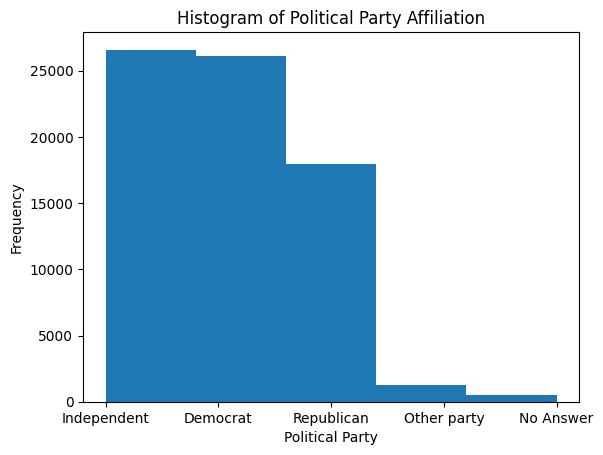

Political Party
Independent    26581
Democrat       26081
Republican     17951
Other party     1292
No Answer        485
Name: count, dtype: int64


In [73]:
#Histogram of Party Affiliation
plt.hist(politics['Political Party'], bins=5)
plt.xlabel('Political Party')
plt.ylabel('Frequency')
plt.title('Histogram of Political Party Affiliation')
plt.show()

#Getting Number Counts for Each Party in the Histogram
party_counts = politics['Political Party'].value_counts()
print(party_counts)

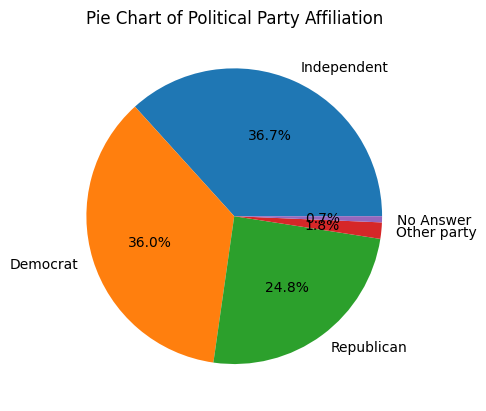

In [74]:
#Pie Chart of Political Party
plt.pie(party_counts, labels=party_counts.index, autopct='%1.1f%%')
plt.title('Pie Chart of Political Party Affiliation')
plt.show()

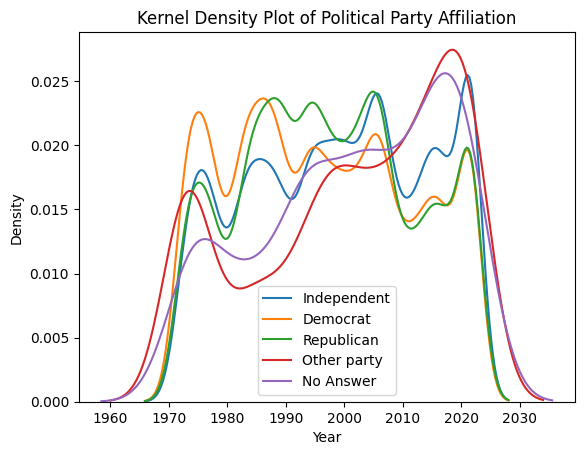

In [75]:
#Kernel Density Plot of Political Party
for party in politics['Political Party'].unique():
    sns.kdeplot(politics[politics['Political Party'] == party]['Year'], label=party)
plt.xlabel('Year')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Political Party Affiliation')
plt.legend()
plt.show()

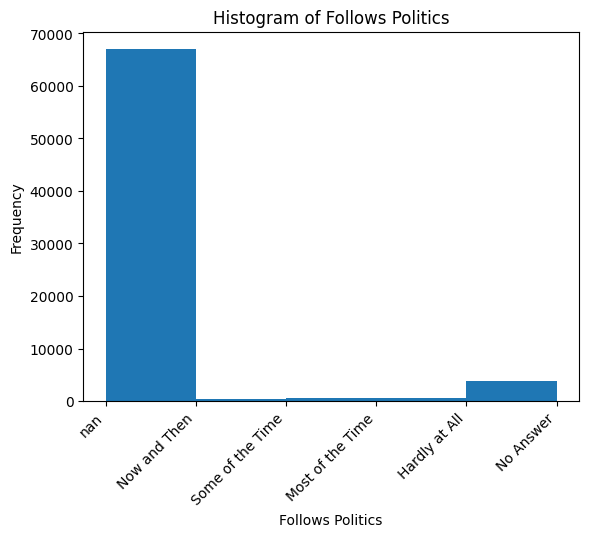

Follows Politics
nan                 66986
No Answer            3565
Some of the Time      649
Most of the Time      632
Now and Then          366
Hardly at All         192
Name: count, dtype: int64


In [76]:
# Replace values in 'Follows Politics' with string labels in order to create histogram
politics['Follows Politics'] = politics['Follows Politics'].astype(str)

#Histogram of Follows Politics
plt.hist(politics['Follows Politics'], bins=5)
plt.xlabel('Follows Politics')
plt.ylabel('Frequency')
plt.title('Histogram of Follows Politics')
plt.xticks(rotation=45, ha='right')
plt.show()

#Getting Number Counts for Each Answer Option
follow_counts = politics['Follows Politics'].value_counts()
print(follow_counts)

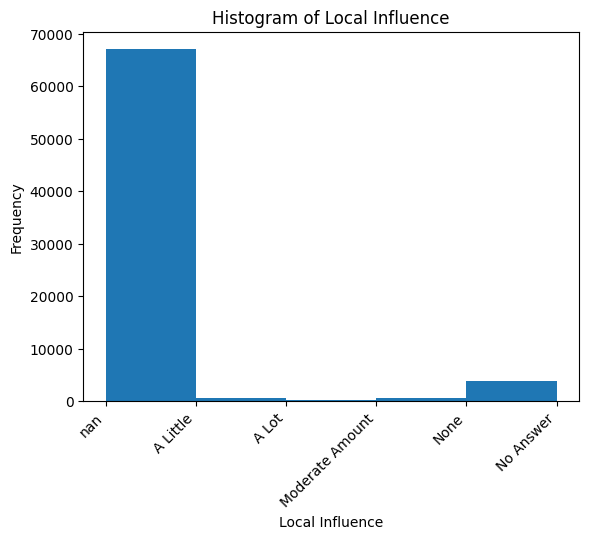

Local Influence
nan                67027
No Answer           3584
A Little             650
Moderate Amount      585
None                 292
A Lot                252
Name: count, dtype: int64


In [78]:
# Replace values in 'Follows Politics' with string labels in order to create histogram
politics['Local Influence'] = politics['Local Influence'].astype(str)

#Histogram of Local Influence
plt.hist(politics['Local Influence'], bins=5)
plt.xlabel('Local Influence')
plt.ylabel('Frequency')
plt.title('Histogram of Local Influence')
plt.xticks(rotation=45, ha='right')
plt.show()

#Number Counts for Each Answer Option
local_counts = politics['Local Influence'].value_counts()
print(local_counts)

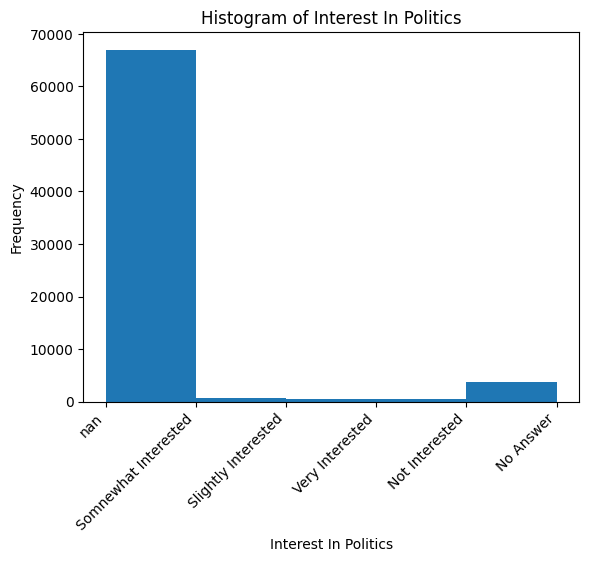

Interest In Politics
nan                     67027
No Answer                3558
Somnewhat Interested      742
Slightly Interested       481
Very Interested           402
Not Interested            180
Name: count, dtype: int64


In [79]:
# Replace values in 'Interest in Politics' with string labels in order to create histogram
politics['Interest In Politics'] = politics['Interest In Politics'].astype(str)

#Histogram of Interest in Politics
plt.hist(politics['Interest In Politics'], bins=5)
plt.xlabel('Interest In Politics')
plt.ylabel('Frequency')
plt.title('Histogram of Interest In Politics')
plt.xticks(rotation=45, ha='right')
plt.show()

#Number Counts for Each Answer Option
interest_counts = politics['Interest In Politics'].value_counts()
print(interest_counts)

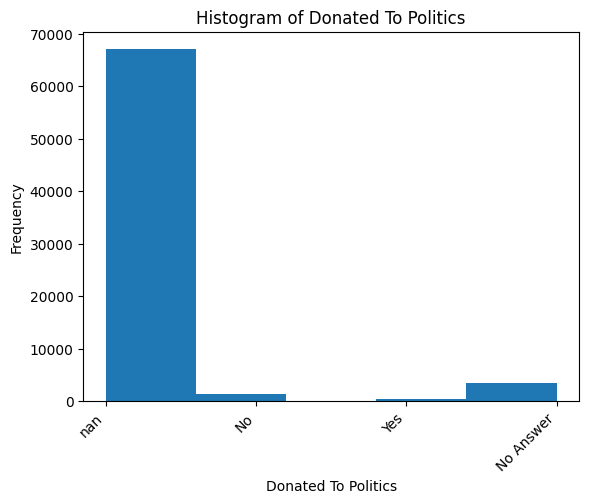

Donated To Politics
nan          67027
No Answer     3556
No            1417
Yes            390
Name: count, dtype: int64


In [80]:
# Replace values in 'Donated To Politics' with string labels in order to create histogram
politics['Donated To Politics'] = politics['Donated To Politics'].astype(str)

#Histogram of 'Doanted To Politics'
plt.hist(politics['Donated To Politics'], bins=5)
plt.xlabel('Donated To Politics')
plt.ylabel('Frequency')
plt.title('Histogram of Donated To Politics')
plt.xticks(rotation=45, ha='right')
plt.show()

#Number Counts for Answer Options
donated_counts = politics['Donated To Politics'].value_counts()
print(donated_counts)

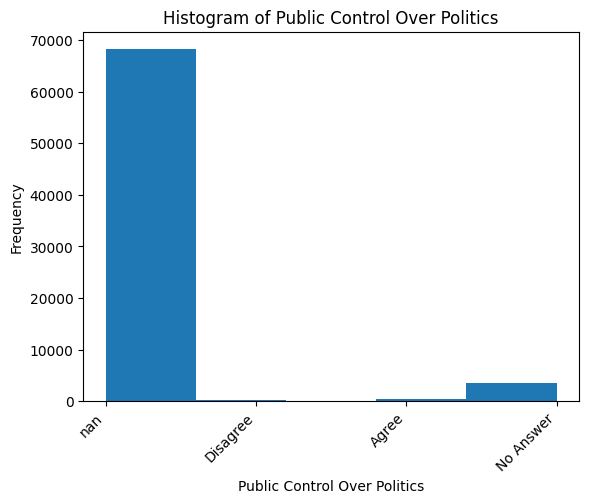

Public Control Over Politics
nan          68169
No Answer     3585
Agree          390
Disagree       246
Name: count, dtype: int64


In [81]:
## Replace values in 'Public Control Over Politics' with string labels in order to create histogram
politics['Public Control Over Politics'] = politics['Public Control Over Politics'].astype(str)

#Histogram of 'Public Control Over Politics'
plt.hist(politics['Public Control Over Politics'], bins=5)
plt.xlabel('Public Control Over Politics')
plt.ylabel('Frequency')
plt.title('Histogram of Public Control Over Politics')
plt.xticks(rotation=45, ha='right')
plt.show()

#Number Counts for Answer Options
public_counts = politics['Public Control Over Politics'].value_counts()
print(public_counts)

In [82]:
#Cross tabulate Political Party and Follows Politics to see what political party follows politics
party_follow = pd.crosstab(politics['Political Party'], politics['Follows Politics'])
print(party_follow)

Follows Politics  Hardly at All  Most of the Time  No Answer  Now and Then  \
Political Party                                                              
Democrat                     86               269       1056           179   
Independent                  75               219       1569           128   
No Answer                     0                 3         38             2   
Other party                   3                 4        107             0   
Republican                   28               137        795            57   

Follows Politics  Some of the Time    nan  
Political Party                            
Democrat                       322  24169  
Independent                    195  24395  
No Answer                        1    441  
Other party                      5   1173  
Republican                     126  16808  


In [83]:
#Cross tabulate Political Party and Local Influence to see if members of different political parties believe they have different influence on local government
party_local = pd.crosstab(politics['Political Party'], politics['Local Influence'])
print(party_local)

Local Influence  A Little  A Lot  Moderate Amount  No Answer  None    nan
Political Party                                                          
Democrat              297    124              253       1062   127  24218
Independent           195     71              173       1584   100  24458
No Answer               3      0                3         36     3    440
Other party             5      1                3        106     6   1171
Republican            150     56              153        796    56  16740


In [84]:
#Cross tabulate Political Party and Interest in Politics to gauge how many people within the different political parties are interested in politics
party_interest = pd.crosstab(politics['Political Party'], politics['Interest In Politics'])
print(party_interest)

Interest In Politics  No Answer  Not Interested  Slightly Interested  \
Political Party                                                        
Democrat                   1053              63                  208   
Independent                1570              80                  174   
No Answer                    36               2                    4   
Other party                 106               2                    5   
Republican                  793              33                   90   

Interest In Politics  Somnewhat Interested  Very Interested    nan  
Political Party                                                     
Democrat                               334              205  24218  
Independent                            208               91  24458  
No Answer                                2                1    440  
Other party                              2                6   1171  
Republican                             196               99  16740  


In [85]:
#Cross tabulate Political Party and Donated to Politics to look at the number of people in each political party who donated money
party_donated = pd.crosstab(politics['Political Party'], politics['Donated To Politics'])
print(party_donated)

Donated To Politics   No  No Answer  Yes    nan
Political Party                                
Democrat             640       1049  174  24218
Independent          467       1571   85  24458
No Answer              9         36    0    440
Other party           12        106    3   1171
Republican           289        794  128  16740


In [86]:
#Cross tabulate Political Party and Public Control Over Politics to gauge how many people in each political party believed they had public control over politics
party_public = pd.crosstab(politics['Political Party'], politics['Public Control Over Politics'])
print(party_public)

Public Control Over Politics  Agree  Disagree  No Answer    nan
Political Party                                                
Democrat                        149        88       1056  24788
Independent                     136        64       1581  24800
No Answer                         1         1         35    448
Other party                       3         1        107   1181
Republican                      101        92        806  16952
